In [1]:
import random as rndd
from numpy import random
import math
import time
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sci

In [2]:
def Discuss(z): #Discuss Function
    m = 0
    t1 = (10**6)*(z[0]**2)
    for i in range(1,len(z)):
        x = z[i]
        m = m + x**2
    return(t1 + m)

In [3]:
def simulate_1d_bm(nsteps=100, t=0.01):
    steps = [ np.random.randn()*np.sqrt(t) for i in range(nsteps) ]
    y = np.cumsum(steps)
    x = [ t*i for i in range(nsteps) ]
    return x

In [4]:
def Optimizer_SSO(Max_iter = 500, SearchAgents_no = 15, dim = 3, lb = 0, ub= 100, objf = 'Discuss',
                             Elite_agents = 7, Inferior_agents = 8):


    # initialize of Elite, Inferior
    Global_pos = np.zeros((1,dim))
    Global_score = np.ones(1)

    Elite_pos = np.zeros((Elite_agents ,dim))
    Elite_score = np.ones((Elite_agents ))

    Inferior_pos = np.zeros((Inferior_agents,dim))
    Inferior_score = np.ones((Inferior_agents))
    a_glob = np.ones((Max_iter,dim))

    if not isinstance(lb, list):
        lb = [lb] * dim
    if not isinstance(ub, list):
        ub = [ub] * dim

    # Initialize the positions of search agents
    Positions = np.zeros((SearchAgents_no, dim))
    Sorted_Positions = np.zeros((SearchAgents_no, dim))
    Convergence_curve = np.zeros(Max_iter)
    Fitness = np.ones((SearchAgents_no))*np.inf
    Sorted_Fitness = np.ones((SearchAgents_no))


    # initalization of search agents

    for i in range(0, SearchAgents_no):
        for j in range(dim):
            Positions[i, j] =(ub[j]-lb[j]) * rndd.random() + lb[j]

        # Calculate objective function for each search agent
        Fitness[i] = eval(objf)(Positions[i, :])


    #Sorting
    Sorted_Positions = sorted(Positions, key = eval(objf))
    Sorted_Fitness = sorted(Fitness)

    # Grouping
    Global_score = Sorted_Fitness[0]
    Global_pos = Sorted_Positions[0].copy()

    for i in range(0, Elite_agents):
        Elite_score[i] = Sorted_Fitness[i]
        Elite_pos[i] = Sorted_Positions[i].copy()


    for i in range(0, Inferior_agents):
        Inferior_score[i] = Sorted_Fitness[Elite_agents+i]
        Inferior_pos[i] = Sorted_Positions[Elite_agents+i].copy()

    for it in range (0, Max_iter):

        # Population Update
        a = 0.2*(1 - it/Max_iter)
        a_glob[it,:] = Elite_pos[1]
        #Elite
        for i in range(0, Elite_agents):
            u = []
            c1 = 1
            c2 = 1
            w = 0.7
            print("Iter: ",it+1, "Agents_no: ",i,"Prev Score: ",Elite_score[i])
            for j in range(dim):
                ra = rndd.random()
                rb = rndd.random()
                values = simulate_1d_bm()
                intt = rndd.randint(0,99)
                ui = Elite_pos[i,j]*values[intt]

                Elite_pos[i,j] =  w*Elite_pos[i,j] + (c1*ra*(- Elite_pos[i,j] + ui)) + c2*rb*(Global_pos[j] - Elite_pos[i][j])

            Elite_score[i] = eval(objf)(Elite_pos[i, :])
            print("Iter: ",it+1, "Agents_no: ",i,"New Score: ",Elite_score[i])

            #Inferior
        for i in range(0, Inferior_agents):
            # Inferior position update

            for j in range(dim):


                Inferior_pos[i,j] = ((rndd.random()* (ub[j] - lb[j])) + lb[j] )

            Inferior_score[i] = eval(objf)(Inferior_pos[i, :])


        #Sorting
        Fitness =  np.concatenate((Elite_score, Inferior_score), axis = 0)
        Positions  =  np.concatenate((Elite_pos, Inferior_pos), axis = 0)

        Sorted_Positions = sorted(Positions, key = eval(objf))
        Sorted_Fitness = sorted(Fitness)

        if Sorted_Fitness[0] < Global_score :
            Global_score = Sorted_Fitness[0]
            Global_pos = Sorted_Positions[0].copy()
            #print("Global_Score", Global_score)

        for i in range(0, len(Elite_score)):
            Elite_score[i] = Sorted_Fitness[i]
            Elite_pos[i] = Sorted_Positions[i].copy()


        for i in range(0, len(Inferior_score)):
            Inferior_score[i] = Sorted_Fitness[Elite_agents+i]
            Inferior_pos[i] = Sorted_Positions[Elite_agents+i].copy()

        Convergence_curve[it] = Global_score


    return Global_score, Convergence_curve

In [5]:
score, curve = Optimizer_SSO(Max_iter = 500, SearchAgents_no = 15, dim = 3, lb = 0, ub= 100, objf = 'Discuss',
                             Elite_agents = 7, Inferior_agents = 8)

Iter:  1 Agents_no:  0 Prev Score:  18537107.81152802
Iter:  1 Agents_no:  0 New Score:  4455799.187969473
Iter:  1 Agents_no:  1 Prev Score:  30277809.949960135
Iter:  1 Agents_no:  1 New Score:  2906214.1217055446
Iter:  1 Agents_no:  2 Prev Score:  63448724.500292085
Iter:  1 Agents_no:  2 New Score:  22002296.06594924
Iter:  1 Agents_no:  3 Prev Score:  155900630.59436318
Iter:  1 Agents_no:  3 New Score:  26941441.479058802
Iter:  1 Agents_no:  4 Prev Score:  259559577.0040375
Iter:  1 Agents_no:  4 New Score:  10644712.02000249
Iter:  1 Agents_no:  5 Prev Score:  295229988.3886924
Iter:  1 Agents_no:  5 New Score:  8750237.703468384
Iter:  1 Agents_no:  6 Prev Score:  490893321.7259063
Iter:  1 Agents_no:  6 New Score:  135740353.11944738
Iter:  2 Agents_no:  0 Prev Score:  2906214.1217055446
Iter:  2 Agents_no:  0 New Score:  795992.627452187
Iter:  2 Agents_no:  1 Prev Score:  4455799.187969473
Iter:  2 Agents_no:  1 New Score:  1293161.0965046494
Iter:  2 Agents_no:  2 Prev Sc

# RLV Re-entry Trajectory Optimization

In [6]:
def Optimizer_SSO_constraints(Max_iter = 500, SearchAgents_no = 15, dim = 3, lb = 0, ub= 100, objf = 'Discuss',
                             Elite_agents = 7, Inferior_agents = 8):


    # initialize of Elite, Inferior
    Global_pos = np.zeros((1,dim))
    Global_score = np.ones(1)

    Elite_pos = np.zeros((Elite_agents ,dim))
    Elite_score = np.ones((Elite_agents ))

    Inferior_pos = np.zeros((Inferior_agents,dim))
    Inferior_score = np.ones((Inferior_agents))
    a_glob = np.ones((Max_iter,dim))

    if not isinstance(lb, list):
        lb = [lb] * dim
    if not isinstance(ub, list):
        ub = [ub] * dim

    # Initialize the positions of search agents
    Positions = np.zeros((SearchAgents_no, dim))
    Sorted_Positions = np.zeros((SearchAgents_no, dim))
    Convergence_curve = np.zeros(Max_iter)
    Fitness = np.ones((SearchAgents_no))*np.inf
    Sorted_Fitness = np.ones((SearchAgents_no))

    # initalization of search agents

    for i in range(0, SearchAgents_no):
        for j in range(dim):
            Positions[i, j] =(ub[j]-lb[j]) * rndd.random() + lb[j]
        # Calculate objective function for each search agent
        Fitness[i] = eval(objf)(Positions[i, :])

        feasiability = t.feasible(Positions[i, :])
        if feasiability is False:
            Fitness[i] = math.inf
        


    #Sorting
    Sorted_Positions = sorted(Positions, key = eval(objf))
    Sorted_Fitness = sorted(Fitness)

    # Grouping
    Global_score = Sorted_Fitness[0]
    Global_pos = Sorted_Positions[0].copy()

    for i in range(0, Elite_agents):
        Elite_score[i] = Sorted_Fitness[i]
        Elite_pos[i] = Sorted_Positions[i].copy()


    for i in range(0, Inferior_agents):
        Inferior_score[i] = Sorted_Fitness[Elite_agents+i]
        Inferior_pos[i] = Sorted_Positions[Elite_agents+i].copy()

    for it in range (0, Max_iter):

        # Population Update
        a = 0.2*(1 - it/Max_iter)
        a_glob[it,:] = Elite_pos[1]
        #Elite
        for i in range(0, Elite_agents):
            u = []
            c1 = 1
            c2 = 1
            w = 0.7
            #print("Iter: ",it+1, "Agents_no: ",i,"Prev Score: ",Elite_score[i])
            for j in range(dim):
                ra = rndd.random()
                rb = rndd.random()
                values = simulate_1d_bm()
                intt = rndd.randint(0,99)
                ui = Elite_pos[i,j]*values[intt]

                Elite_pos[i,j] =  w*Elite_pos[i,j] + (c1*ra*(- Elite_pos[i,j] + ui)) + c2*rb*(Global_pos[j] - Elite_pos[i][j])

            Elite_score[i] = eval(objf)(Elite_pos[i, :])
            feasiability = t.feasible(Elite_pos[i, :])
            if feasiability is False:
                Elite_score[i] = math.inf
            #print("Iter: ",it+1, "Agents_no: ",i,"New Score: ",Elite_score[i])

            #Inferior
        for i in range(0, Inferior_agents):
            # Inferior position update

            for j in range(dim):


                Inferior_pos[i,j] = ((rndd.random()* (ub[j] - lb[j])) + lb[j] )

            Inferior_score[i] = eval(objf)(Inferior_pos[i, :])
            feasiability = t.feasible(Inferior_pos[i, :])
            if feasiability is False:
                Inferior_score[i] = math.inf


        #Sorting
        Fitness =  np.concatenate((Elite_score, Inferior_score), axis = 0)
        Positions  =  np.concatenate((Elite_pos, Inferior_pos), axis = 0)

        Sorted_Positions = sorted(Positions, key = eval(objf))
        Sorted_Fitness = sorted(Fitness)

        if Sorted_Fitness[0] < Global_score :
            Global_score = Sorted_Fitness[0]
            Global_pos = Sorted_Positions[0].copy()
            #print("Global_Score", Global_score)

        for i in range(0, len(Elite_score)):
            Elite_score[i] = Sorted_Fitness[i]
            Elite_pos[i] = Sorted_Positions[i].copy()


        for i in range(0, len(Inferior_score)):
            Inferior_score[i] = Sorted_Fitness[Elite_agents+i]
            Inferior_pos[i] = Sorted_Positions[Elite_agents+i].copy()

        if it%25 ==0:
            print(f'Iter {it}, Current Global Score: {Global_score}')

        Convergence_curve[it] = Global_score


    return Global_pos

In [7]:
from rlv_empirical_data import database

class optimizer:
    # create instance
    atm = database()

    # bounds
    alpha_min, alpha_max = 0, 40
    
    # calculate constraint functions with c_alpha
    def calculate(self, alpha):
        #print(self.y)
        # [h, v, gamma, lamda, phi, psi] = y
        h = self.y[0];  v = self.y[1];
        # [R, K, T0]    = tem_data
        R = self.tem_data[0]; K = self.tem_data[1];
        # [S, k]        = aero_data
        S = self.aero_data[0]; k = self.aero_data[1];
        # [Rn, m, rho0] = orb_data
        Rn = self.orb_data[0]; m = self.orb_data[1]; rho0 = self.orb_data[2];
        
        # evaluate functions  
        # get atmosphere details (alt in km)
        h_km = (h/1000.0)    
        T, rho, p, m = self.atm.get_atmospheric_data(h_km)

        # get CLa, CD0 for Mach number (from tables) 
        mach = v / math.sqrt( K * R * T)
        CLa, CD0 = self.atm.get_mach_data(mach)   

        # dynamic pressure estimation
        Qp = 1./2. * rho * v**2
        Qp_kpa = (Qp/1000.0)

        # lift, drag estimation        
        CL = CLa * math.radians(alpha) # /rad
        CD = CD0 + k*CL**2
        D = Qp * S * CD       # drag
        L = Qp * S * CL       # lift

        # heat flux estimation
        # move the sign outside to prevent numpy error on negative power
        #q = 18300/np.sqrt(Rn) * np.power(rho,0.5) * np.power(v/1e4,3.05)        
        r_ratio = rho; v_ratio = v/1e4
        r_t = np.sign(r_ratio) * (np.abs(r_ratio)) ** (0.5)
        v_t = np.sign(v_ratio) * (np.abs(v_ratio)) ** (3.05)        
        q = 18300/np.sqrt(Rn) * r_t * v_t

        return [alpha, L, D, Qp_kpa, q] 

    # constraints
    # (1) Qp < 45 kPa         # Dynamic pressure
    # (2) q < 18.5 W/cm^2     # Heat flux
    def feasible(self, x):
        alpha = x[0]
        alpha, L, D, Qp_kpa, q = self.calculate(alpha)        
        # enforce constraints
        if Qp_kpa > 45.0:        # Dynamic pressure < 45 kPa
            return False
        if q > 18.5:           # Heat flux < 18.5 W/cm^2 
            return False
        return True

    # initalize problem 
    def __init__(self):
        # seed
        random.seed(64)
        
        # rlv data storage for eval function
        self.y = None
        self.ctrl_data = None; self.orb_data = None;
        self.tem_data = None;  self.aero_data = None

    # get the optimized control value
    def get_values(self, y, ctrl_data, orb_data, tem_data, aero_data):
        # store the data for local processing
        [h, v, gamma, lamda, phi, psi] = y[-1]
        [alpha, L, D] = ctrl_data[-1]
        [Rn, m, rho0] = orb_data
        [R, K, T0]    = tem_data
        [S, k]        = aero_data
        self.y = y[-1]
        self.ctrl_data = ctrl_data[-1]
        self.orb_data = orb_data
        self.tem_data = tem_data
        self.aero_data = aero_data        
        # get the optimized control values
        hof = Optimizer_SSO_constraints(dim = 1, lb = self.alpha_min, ub= self.alpha_max , objf= 'eval_tt')
        # get the L and D values for the alpha 
        alpha = hof[0]
        alpha, L, D, Qp_kpa, q = self.calculate(alpha)

        return alpha, L, D
    


In [8]:
t = optimizer() # Initalize

# fitness with c_alpha, minimize weighted sum
def eval_tt(x):
    alpha = x[0]
    # get the values for minimize
    alpha, L, D, Qp_kpa, q = t.calculate(alpha)
    # weighted sum average
    weights = [0.8, 0.5]
    functions = [Qp_kpa, q]
    # weighted sum average
    fit = sum(x * y for x, y in zip(weights, functions)) / sum(functions) 
    #fit = sum(weights[i]*f for i, f in enumerate(functions) )
    return fit

Iter 0, Current Global Score: 0.5001414770454383
Iter 25, Current Global Score: 0.5001414770454383
Iter 50, Current Global Score: 0.5001414770454383
Iter 75, Current Global Score: 0.5001414770454383
Iter 100, Current Global Score: 0.5001414770454383
Iter 125, Current Global Score: 0.5001414770454383
Iter 150, Current Global Score: 0.5001414770454383
Iter 175, Current Global Score: 0.5001414770454383
Iter 200, Current Global Score: 0.5001414770454383
Iter 225, Current Global Score: 0.5001414770454383
Iter 250, Current Global Score: 0.5001414770454383
Iter 275, Current Global Score: 0.5001414770454383
Iter 300, Current Global Score: 0.5001414770454383
Iter 325, Current Global Score: 0.5001414770454383
Iter 350, Current Global Score: 0.5001414770454383
Iter 375, Current Global Score: 0.5001414770454383
Iter 400, Current Global Score: 0.5001414770454383
Iter 425, Current Global Score: 0.5001414770454383
Iter 450, Current Global Score: 0.5001414770454383
Iter 475, Current Global Score: 0.50

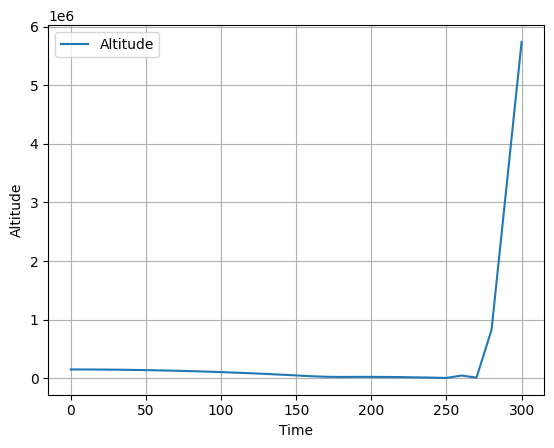

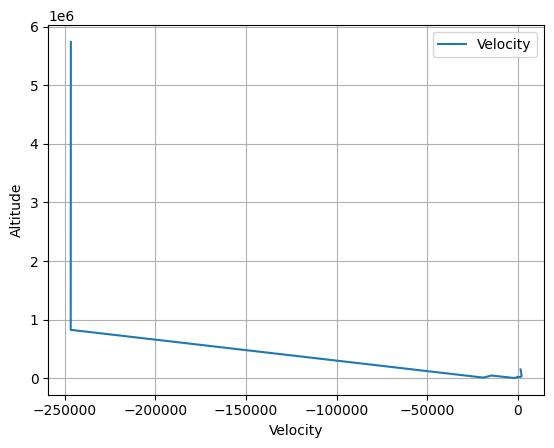

In [10]:
# constants
deg    = math.pi/180   # convert degrees to radians
g0     = 9.81          # sea-level acceleration of gravity (m/s)
Re     = 6378e3        # radius of the earth (m)
rho0   = 1.225         # sea level density of atmosphere (kg/m^3)

R = 287.4              # specific gas constant for air
K = 1.4                # ratio of specific heat of a gas at a constant pressure to heat at a constant volume (1.4 for air)
T0 = 288.15            # K standard temperature at sea level

# RLV values
Rn     = 0.25          # nose radius (m)
Mo     = 1750          # Mass at orbit (kg)
Mp     = 300           # Mass Mass of propellant (kg)
m = Mo + Mp            # total mass

# aerodynamic constant
S      = 0.785         # frontal area, m^2
k      = 0.18          # aerodynamic constant, 0.03

# control variable
alpha  = 0.0           # to be optimized from genetic
sigma  = 0.0           # bank angle assumed 0

# initial conditions:
h0, v0, gamma0, lamda0, phi0, psi0 = 150000,1500,0,0,0,0

# initial conditions vector:
f0 = [h0, v0, gamma0, lamda0, phi0, psi0]
          
# alpha, L, D
c0 = [alpha, 0, 0] 

# orbiter data
orb_data = [Rn, m, rho0]

# heat constants
tem_data = [R, K, T0]

# aerodynamic constants
aero_data = [S, k]

# equations of motion for a lifting trajectory
def ode_functions(t, y, *args):
    # args from genetic optimizer
    alpha, L, D = args
    
    # output as col vector
    dydt = np.zeros(6)
    # compute angles (lambda is python function)
    [h, v, gamma, lamda, phi, psi] = y
    s_phi = np.sin(phi);     c_phi = np.cos(phi);
    s_gamma = np.sin(gamma); c_gamma = np.cos(gamma);
    s_psi = np.sin(psi);     c_psi = np.cos(psi);
    c_lamda = np.cos(lamda); s_lamda = np.sin(lamda);
    c_alpha = np.cos(alpha); s_alpha = np.sin(alpha);    
    c_sigma = np.cos(sigma); s_sigma = np.sin(sigma);

    g = g0/(1 + h/Re)**2     # gravity with altitude h  
    r = Re + h               # radial vector (m)

    T = 0.0      # Thrust = 0, placeholder for future
    
    # equations of motion for a lifting trajectory
    h_dot = v * s_gamma    
    v_dot = - g * s_gamma + ( (T * c_alpha - D) / m)
    gamma_dot = (v / r - g / v) * c_gamma  + (L  + T * s_alpha) / (m * v) * c_sigma
    psi_dot =  -(v/r) * c_gamma * c_psi * (s_phi / c_phi) + (L  + T * s_alpha)/(m * v) * s_sigma / c_gamma
    lamda_dot = v / r * (c_gamma * c_psi) / c_phi
    phi_dot = v / r * c_gamma * s_psi    
    # pack derivative in output vector
    dydt[0]  = h_dot
    dydt[1]  = v_dot
    dydt[2]  = gamma_dot
    dydt[3]  = lamda_dot
    dydt[4]  = phi_dot
    dydt[5]  = psi_dot
    return dydt  


# plot results
def plot(times, Y):
    # split the result into columns
    cols = list(zip(*Y))

    # plot
    fig = plt.figure()
    plt1 = plt.plot(times, cols[0], label="Altitude")
    plt.xlabel("Time")
    plt.ylabel("Altitude")
    plt.legend()
    plt.grid()
    plt.show()

    plt2 = plt.plot(cols[1], cols[0], label="Velocity")
    plt.xlabel("Velocity")
    plt.ylabel("Altitude")
    plt.legend()
    plt.grid()
    plt.show()
    
    return
    
# main function
if __name__ == "__main__":

    # initilize genetic optimizer
    
    Y = []       # [h, v, gamma, lamda, phi, psi]
    Y.append(f0) # start position
    
    control = [] # [alpha, L, D]
    control.append(c0)

    # integration time step 
    endtime = 300; t_step = 10;
    
    # list of time steps 
    times = np.linspace(0, endtime, int(endtime / t_step) + 1)
    
    # integrate
    for t_start, t_end in zip(times, times[1:]):
        # ode integration period
        t_span = [t_start, t_end]
        
        # current init = previous last
        f0 = Y[-1]
        
        # optimize alpha for the given constraints
        alpha_new, L_new, D_new = t.get_values(Y, control, orb_data, tem_data, aero_data)

        # pack args list
        args = [alpha_new, L_new, D_new]
        control.append(args)
        
        # solve next ode step
        answer = sci.solve_ivp(ode_functions, t_span, f0, args=args)
        
        # create new input for next iteration
        x = [answer.y[i][-1] for i in range(len(f0))]
        
        # solution list
        Y.append(x)

    # plot the results
    plot(times, Y)
    